<a href="https://colab.research.google.com/github/Brigante-azul/Caminata-aleatoria-confinada-sim/blob/main/RandomWalk_confinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importo librerias y defino funciones

In [ ]:
#Importo librerias
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
import seaborn as sns
from scipy.stats import chisquare

In [ ]:
#Defino la transformada y algunas funciones mas
from scipy.fft import fft, fftfreq

def transformada(t, cor):
  N = len(t)
  T = t[1]-t[0]

  xf = fftfreq(N, T)[:N//2]
  yf = fft(cor)

  yf_norm = 2.0/N * np.abs(yf[0:N//2])

  return xf, yf_norm
  
def linear(x, a, b):
    return a*x+b

def gaussian(x, M, std):
  y_values = 1/(std * np.sqrt(2 * np.pi)) *np.exp( - (x - M)**2 / (2 * std**2))
  return   y_values

# Genero la simulacion y grafico trayectorias (2D)

In [ ]:
def MC(N):
  u=np.random.uniform(0,1,size=N)
  nu=np.random.uniform(0,1,size=N)
  return np.sqrt(-2*np.log(u))*np.cos(2*np.pi*nu)
  

def distribucion(a, b, w, N, t, dt, v0):
  n=len(t)
  x = np.zeros( (N,n) )
  v= np.zeros( (N,n) )
  
  for i in range(1, len(t)):
    u=np.random.uniform(0,1,size=N)
    nu=np.random.uniform(0,1,size=N)

    v_t=v[:, i-1]- w*x[:, i-1]*dt+np.sqrt(2*a*b*dt)*np.sqrt(-2*np.log(u))*np.cos(2*np.pi*nu)-v[:,i-1]*b*dt+v0

    v[:, i]=v_t
    x[:,i]=x[:, i-1]+v_t*dt

  return x

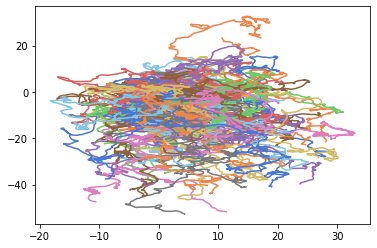

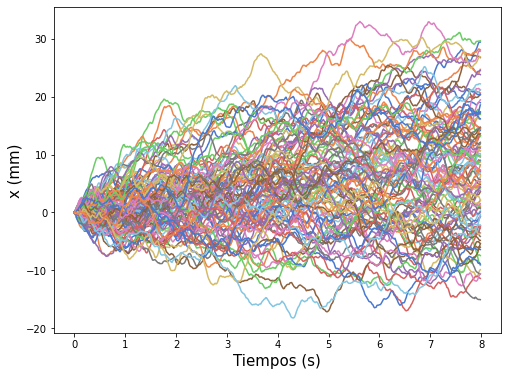

(Text(0.5, 0, 'Tiempos (s)'), Text(0, 0.5, 'y (mm)'))

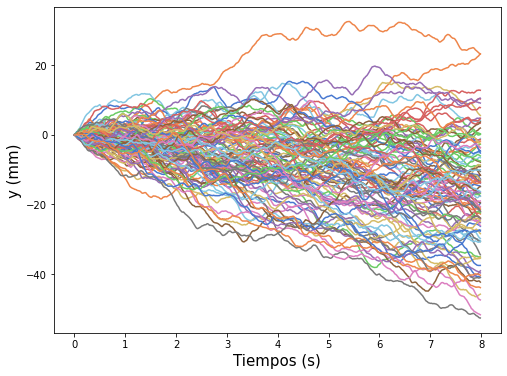

In [ ]:
T = 8
dt = 8/500

#Creo un vector de tiempos
t=np.arange(0, T, dt)

#Defino N como la cantidad de trayectorias
N=102

ax=1970.8933823529412
bx=14.65
wx=1.163
vx0=0.3*3.52
#vx0=4.9

x_i=distribucion(ax, bx, wx, N, t, dt, vx0)
x=x_i/3.52

ay=1550
by=11
wy=-0.6
vy0=-0.3*3.52
#vy0=0

y_i=distribucion(ay, by, wy, N, t, dt, vy0)
y=y_i/3.52

tema="muted"
pal=sns.color_palette(tema, N+1)

for k in range(N):
  plt.plot(x[k], y[k], color=pal[k])
plt.show()

plt.figure(figsize=(8, 6))
for k in range(N):
  plt.plot(t,x[k], color=pal[k])
  
plt.xlabel("Tiempos (s)", fontsize=15), plt.ylabel("x (mm)", fontsize=15)
plt.show()

plt.figure(figsize=(8,6))
for k in range(N):
  plt.plot(t,y[k], color=pal[k])

plt.xlabel("Tiempos (s)", fontsize=15), plt.ylabel("y (mm)", fontsize=15)
# plt.show()

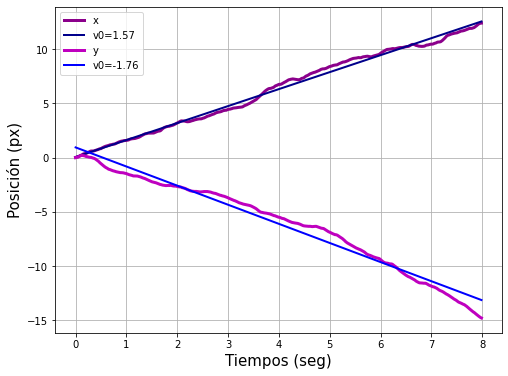

1.5653518617358386 -1.7628345490593205


In [ ]:
x_mean = np.mean(x, axis=0)
y_mean = np.mean(y, axis=0)
pal=["darkmagenta", "m"]
pal_ajuste=["darkblue","blue"]

"v0"
x_space=np.linspace(t[0], t[len(t)-1], 500)

plt.figure(figsize=(8, 6))
plt.plot(t, x_mean, label="x", color=pal[0], linewidth=3)
param_x, cov=curve_fit(linear, t, x_mean)
sigma=np.sqrt(np.diag(cov))
plt.plot(x_space, linear(x_space, *param_x), label="v0={}".format(np.round(param_x[0], 2)), color=pal_ajuste[0], linewidth=2)

plt.plot(t, y_mean, label="y", color=pal[1],  linewidth=3);
param_y, cov=curve_fit(linear, t, y_mean)
sigma=np.sqrt(np.diag(cov))
plt.plot(x_space, linear(x_space, *param_y), label="v0={}".format(np.round(param_y[0], 2)),  color=pal_ajuste[1], linewidth=2)

plt.xlabel("Tiempos (seg)", fontsize=15), plt.ylabel("Posición (px)", fontsize=15)
plt.grid(True)
plt.legend()
plt.show()

v0_x, v0_y=param_x[0], param_y[0]
print(v0_x, v0_y)

# Desviación

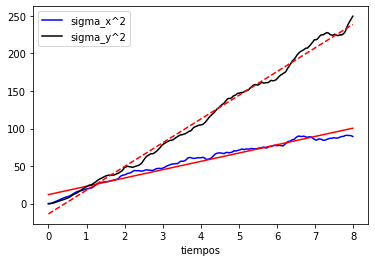

3.327538247132974 5.621061136117051


In [ ]:
"Desviación"

desviacion_x = np.std(x, axis=0)
desviacion_y = np.std(y, axis=0)

x_space=np.linspace(t[0], t[len(t)-1], 500)

plt.plot(t, desviacion_x**2, label="sigma_x^2", color="b")
param_x, cov=curve_fit(linear, t, desviacion_x**2)
sigma=np.sqrt(np.diag(cov))
plt.plot(x_space, linear(x_space, *param_x), color="r")

plt.plot(t,desviacion_y**2, label="sigma_y^2", color="k");
param_y, cov=curve_fit(linear, t, desviacion_y**2)
sigma=np.sqrt(np.diag(cov))
plt.plot(x_space, linear(x_space, *param_y), "--", color="r")
plt.xlabel("tiempos")

plt.legend()
plt.show()
sigma_x, sigma_y=np.sqrt(param_x[0]), np.sqrt(param_y[0])
print(sigma_x, sigma_y)

# Correlacion cruzada (2D)

In [ ]:
#Calculo los deltas para x e y
DY = y[:,1:]-y[:,:-1]
DX = x[:,1:]-x[:,:-1]
#Calculo el valor medio en el tiempo de cada delta de trayectoria en x e y
DY_medio = np.mean(DY, axis=1)
DX_medio = np.mean(DX, axis=1)

#Lista donde guardo las correlaciones cruzadas entre deltas de diferentes trayectorias
CC = []
alturas_p=[]
tiempos_p=[]

In [ ]:
fig7 = plt.figure(figsize=(10,8))

#Lista donde guardo las correlaciones cruzadas entre deltas de diferentes trayectorias
CC = []

tema="muted" 
pal_corr=sns.color_palette(tema, N**2)

tc = np.linspace(-t[-1], t[-1], 2*len(t)-3) #tiempos para correlacion
count = 0
for i in range(N):
    for j in range(N):
      
        #Correlacion entre la delta de la trayectoria i con la delta de la trayectoria j
        cc = np.correlate(DX[i,:]-np.mean(DX[i,:]), DY[j,:]-np.mean(DY[i,:]), mode="full")
        CC.append(cc)
        plt.plot(tc, cc, alpha=0.6, color=pal_corr[count]);
        count+=1
        
#Calculo el valor medio de las correlaciones cruzadas sobre las trayectorias
CC = np.array(CC)
CC_M = np.mean(CC, axis=0)

plt.ylim(-40, 40)        
plt.plot(tc, CC_M, c="darkmagenta", linewidth=3, label="valor medio");

plt.ylabel("Correlaciones cruzadas (mm^2)", fontsize=15);
plt.xlabel("Tiempo (s)", fontsize=15)

plt.grid();
plt.legend();

In [ ]:
for i in range(N):
    for j in range(N):
      if i%40==0and j%35==0:     
        plt.figure(figsize=(8, 6)) 
        #Correlacion entre la delta de la trayectoria i con la delta de la trayectoria j
        cc = np.correlate(DX[i,:]-np.mean(DX[i,:]), DY[j,:]-np.mean(DY[i,:]), mode="full")
        CC.append(cc)
        plt.plot(tc, cc, alpha=0.6, color=pal_corr[count]);
        count+=1

        #plt.ylim(-40, 40)        
        #plt.plot(tc, CC_M, c="darkmagenta", linewidth=3, label="valor medio");

        plt.ylabel("Correlaciones cruzadas (mm^2)", fontsize=15);
        plt.xlabel("Tiempo (s)", fontsize=15)

        plt.grid();
        plt.legend();

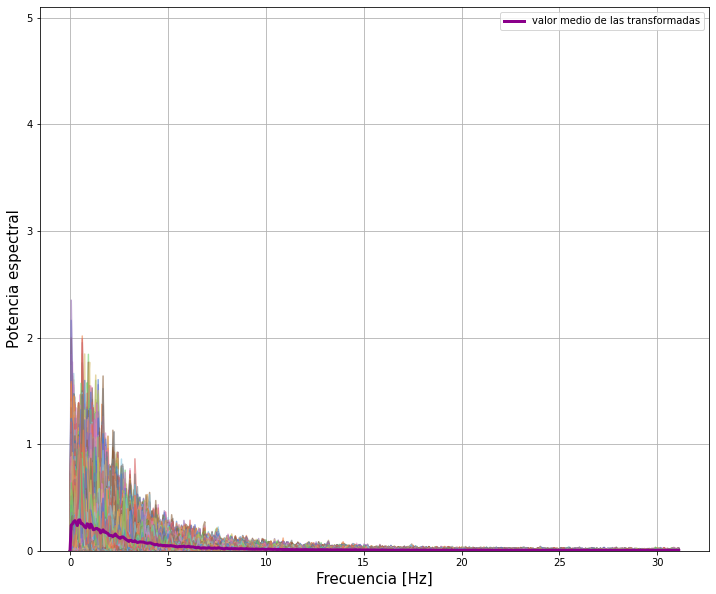

In [ ]:
fig9 = plt.figure(figsize=(12,10))

y_transf_cc = []

for k in range( len(CC) ):
  xf, yf = transformada(tc, CC[k,:])
  y_transf_cc.append(yf)
  plt.plot(xf, yf, alpha=0.6, color=pal_corr[k]);


plt.ylim(0, 5.1)
y_transf_cc = np.array(y_transf_cc)
y_transf_promedio_cc = np.mean(y_transf_cc, axis=0)
plt.plot(xf, y_transf_promedio_cc, "darkmagenta", linewidth=3, label="valor medio de las transformadas");

plt.ylabel("Potencia espectral", fontsize=15);
plt.xlabel("Frecuencia [Hz]", fontsize=15);

plt.legend();
plt.grid();

In [ ]:
print(l_yf)

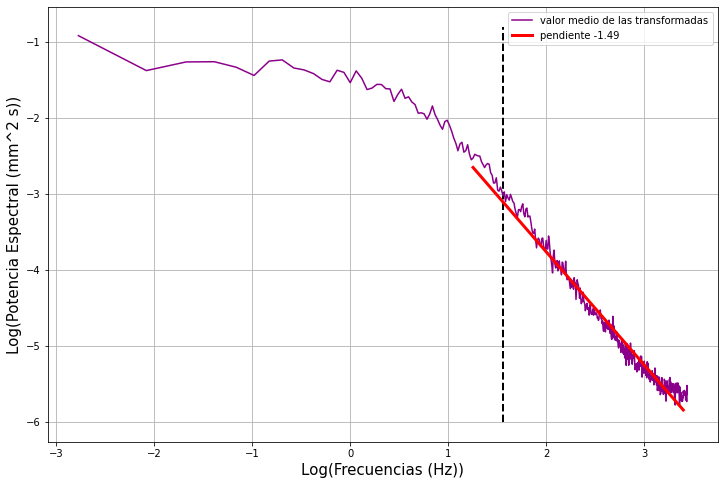

In [ ]:
l_xf=np.log(xf[1:])
l_yf=np.log(yf_M[1:])

com=75
fin=len(l_xf)-20
param,cov=curve_fit(linear, l_xf[com:fin], l_yf[com:fin] )
x_space=np.linspace(l_xf[com-20], l_xf[fin], 500)

plt.figure(figsize=(12, 8))
plt.plot(l_xf, l_yf, color="darkmagenta", label="valor medio de las transformadas")
plt.plot(x_space, linear(x_space, *param), color="r", linewidth=3, label="pendiente %s"%np.round(param[0], 2))
plt.vlines(l_xf[com], -6, -0.8, linestyles="--", linewidth=2)
plt.xlabel("Log(Frecuencias (Hz))", fontsize=15), plt.ylabel("Log(Potencia Espectral (mm^2 s))", fontsize=15)
plt.grid(True)
plt.legend()

In [ ]:
np.savetxt("/content/drive/MyDrive/Labo 5/caminata/25-06/f20_120/log potencia espectral sim.txt", np.transpose([l_xf, l_yf]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Autocorrelacion y su transformada (2D)

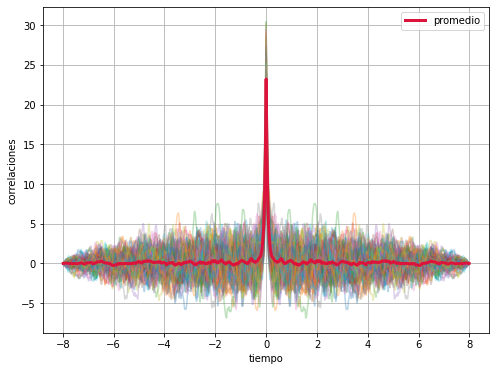

In [ ]:
fig = plt.figure(figsize=(8,6))

AC = []
maximos=[]

n=len(t)
tc = np.linspace(-t[-1], t[-1], 2*n-3)
for i in range(N):
      #Correlacion entre la delta de la trayectoria i con la delta de la trayectoria j
      ac = np.correlate(DX[i,:], DX[i,:], mode="full")
      AC.append(ac)
      maximos.append(np.max(ac))
      plt.plot(tc, ac, alpha=0.3);
      
AC = np.array(AC)
  
#Calculo el valor medio de las correlaciones cruzadas sobre las trayectorias
AC_M = np.mean(AC, axis=0)

plt.plot(tc, AC_M,"-" ,color="crimson", label="promedio", linewidth=3);
plt.ylabel("correlaciones");
plt.xlabel("tiempo")

#plt.xticks(tc[::2])
#plt.xlim(-0.5, 0.5)
plt.grid();
plt.legend()

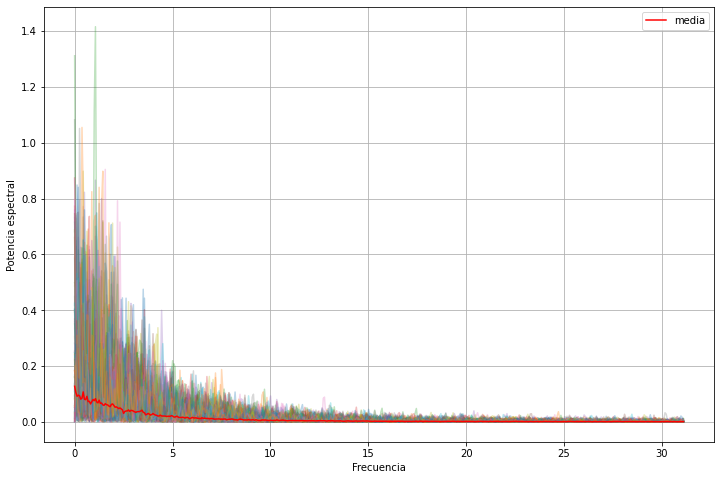

In [ ]:
fig = plt.figure(figsize=(12,8))

y_transf = []

for k in range( len(AC) ):
  xf, yf = transformada(tc, AC[k,:])
  y_transf.append(yf)
  plt.plot(xf, yf/2, alpha=0.3);

#plt.xticks(xf[::9])
plt.grid();
plt.ylabel("Potencia espectral");
plt.xlabel("Frecuencia");

y_transformada = np.array(y_transf)
yf_M=np.mean(y_transformada/2, axis=0)
plt.plot(xf, yf_M/2, color="r", label="media")

xf, yf=transformada(tc, AC_M)
#plt.plot(xf, yf ,color="crimson", label="transf de media")
plt.legend()

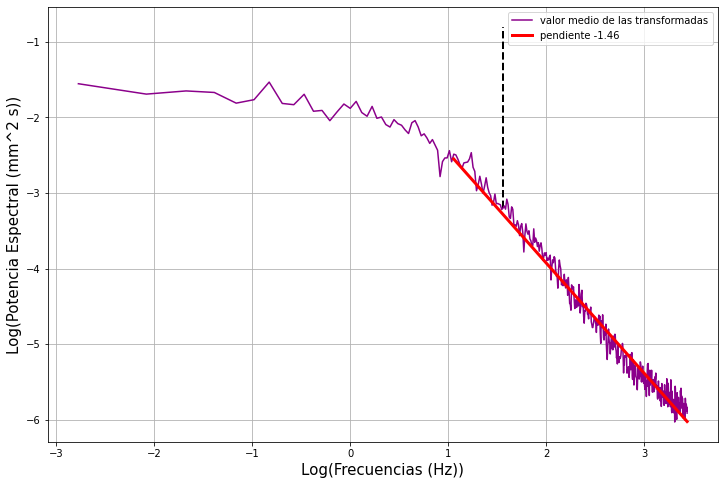

In [ ]:
l_xf=np.log(xf[1:])
l_yf=np.log(yf_M[1:])

com=75
fin=len(l_xf)-1
param,cov=curve_fit(linear, l_xf[com:fin], l_yf[com:fin] )
x_space=np.linspace(l_xf[com-30], l_xf[fin], 500)

plt.figure(figsize=(12, 8))
plt.plot(l_xf, l_yf, color="darkmagenta", label="valor medio de las transformadas")
plt.plot(x_space, linear(x_space, *param), color="r", linewidth=3, label="pendiente %s"%np.round(param[0], 2))
plt.vlines(l_xf[com], -3.2, -0.8, linestyles="--", linewidth=2)
plt.xlabel("Log(Frecuencias (Hz))", fontsize=15), plt.ylabel("Log(Potencia Espectral (mm^2 s))", fontsize=15)
plt.grid(True)
plt.legend()

np.savetxt("/content/drive/MyDrive/Labo 5/caminata/25-06/f20_120/log_auto_potencia_espectral_sim.txt", np.transpose([l_xf, l_yf]))


In [ ]:
l_xf[60]

1.3392836322269563

# MSD (2D)

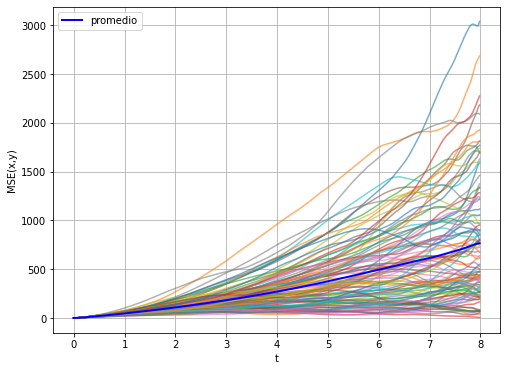

In [ ]:
fig8 = plt.figure(figsize=(8,6))

#Calculo el MSE <(x(t+Tau)-x(t))² + (y(t+Tau)-y(t))²>:

#Lista donde guardo los valores del MSE para cada Tau.
MSE = []
MSE.append(np.zeros(N)) #El primer elemento corresponde a Tau=0 y es un vector de ceros

for k in range(1,len(t)):
    mean_k = np.mean((x[:, k:]-x[:, :-k])**2 + (y[:, k:]-y[:, :-k])**2, axis=1) #Vector de MSE para cada trayectoria con tau fijo
    MSE.append(mean_k)

#Como la matriz MSE tiene en cada fila todas las trayectorias a tau fijo, la transpongo para que tau este en las columnas y las tratectorias en las filas.
MSE = np.array(MSE).transpose()

#Grafico el MSE para cada trayectoria en funcion de Tau
for k in range(N):
    plt.plot(t,MSE[k,:], alpha=0.6);
    
#Calculo el valor medio del MSD a cada tau fijo sobre las trayectorias
MSE_medio = np.mean(MSE, axis=0)

#MSD teorico
#MSE_teorico =  (vx0*t)**2 + t*s**2 + (vy0*t)**2 + t*sigma_x**2+  t*sigma_y**2

plt.plot(t, MSE_medio, c="b", label="promedio", linewidth=2);
#plt.plot(t, MSE_teorico, c="k", label=r"teorico", linewidth=2);
    
plt.ylabel("MSE(x,y)");
plt.xlabel("t");

plt.grid();
plt.legend();